In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd


In [165]:
# Importing data
df_2018= pd.read_excel('2017-18 ACT_school_suppressed.xlsx')
df_2022= pd.read_excel('2021-22_ACT_school_suppressed.xlsx')
df_2018.head()


,District,District Name,School,School Name,Subgroup,Valid Tests,Participation Rate,Average English Score,Average Math Score,Average Reading Score,Average Science Score,Average Composite Score,Number Scoring 21 or Higher,Percent Scoring 21 or Higher,Number Scoring Below 19,Percent Scoring Below 19
0,10,Anderson County,2,Anderson County High School,All Students,239,100,19.1,19.2,20,20.1,19.7,99,41.6,103,43.3
1,10,Anderson County,2,Anderson County High School,Black/Hispanic/Native American,3,*,*,*,*,*,*,*,*,*,*
2,10,Anderson County,2,Anderson County High School,Economically Disadvantaged,62,100,17.4,18.2,18.3,18.6,18.3,21,33.9,32,51.6
3,10,Anderson County,2,Anderson County High School,English Learners,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN
4,10,Anderson County,2,Anderson County High School,Students with Disabilities,28,100,13.5,15.8,14.8,15.9,15.1,3,10.7,25,89.3


In [166]:
# Filtering data to use 'all students' data
df_2018_all_students=df_2018[df_2018['Subgroup']== 'All Students']
df_2022_all_students= df_2022[df_2022['Subgroup']== 'All Students']
print(df_2018_all_students)


      District                District Name  School  \
0           10              Anderson County       2   
5           10              Anderson County      25   
10          12                    Oak Ridge      35   
15          20               Bedford County      13   
20          20               Bedford County      20   
...        ...                          ...     ...   
1845       985  Achievement School District      45   
1850       985  Achievement School District      50   
1855       985  Achievement School District    8055   
1860       985  Achievement School District    8065   
1865       985  Achievement School District    8140   

                                     School Name      Subgroup  Valid Tests  \
0                    Anderson County High School  All Students          239   
5                            Clinton High School  All Students          266   
10                         Oak Ridge High School  All Students          277   
15                     

In [167]:
# Checking 2018 data for missing values
print(df_2018_all_students.isna().sum())

# Finding the rows with missing data
rows_with_missing_data = df_2018_all_students[df_2018_all_students.isna().any(axis=1)]
print(rows_with_missing_data)

# The schools do not have any valid tests so they will be dropped
df_2018_all_students_cleaned= df_2018_all_students.dropna()

# Filter out rows where 'Average Composite Score' is '*'
filtered_data_18_cleaned = df_2018_all_students_cleaned[df_2018_all_students_cleaned['Average Composite Score'] != '*']

print(filtered_data_18_cleaned.isna().sum())

District                        0
District Name                   0
School                          0
School Name                     0
Subgroup                        0
Valid Tests                     0
Participation Rate              0
Average English Score           3
Average Math Score              3
Average Reading Score           3
Average Science Score           3
Average Composite Score         3
Number Scoring 21 or Higher     0
Percent Scoring 21 or Higher    3
Number Scoring Below 19         0
Percent Scoring Below 19        3
dtype: int64
      District                      District Name  School  \
265        190                    Davidson County     302   
930        580                      Marion County      75   
1830       970  Department of Children's Services      65   

                                 School Name      Subgroup  Valid Tests  \
265         Harris-Hillman Special Education  All Students            0   
930                     Central Prep Academy  Al

In [168]:
# Checking 2022 data for missing values
print(df_2022_all_students.isnull().sum())

# Filter out rows where 'Average Composite Score' is '*'
filtered_data_22_cleaned = df_2022_all_students[df_2022_all_students['Average Composite Score'] != '*']

print(filtered_data_22_cleaned.isna().sum())

District                        0
District Name                   0
School                          0
School Name                     0
Subgroup                        0
Valid Tests                     0
Participation Rate              0
Average English Score           0
Average Math Score              0
Average Reading Score           0
Average Science Score           0
Average Composite Score         0
Number Scoring 21 or Higher     0
Percent Scoring 21 or Higher    0
Number Scoring Below 19         0
Percent Scoring Below 19        0
dtype: int64
District                        0
District Name                   0
School                          0
School Name                     0
Subgroup                        0
Valid Tests                     0
Participation Rate              0
Average English Score           0
Average Math Score              0
Average Reading Score           0
Average Science Score           0
Average Composite Score         0
Number Scoring 21 or Higher     0
P

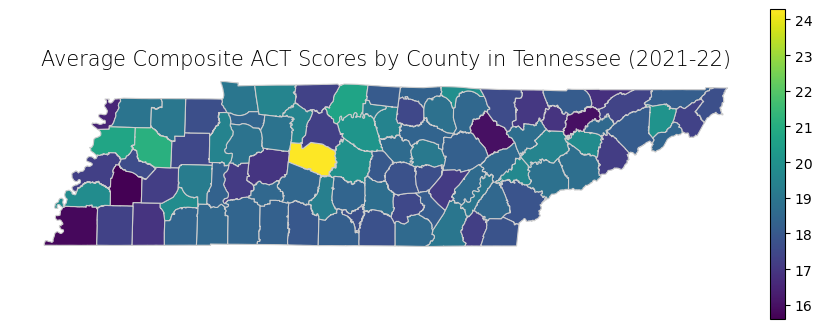

In [169]:
# Load the ACT scores data
df_2022 = pd.read_excel('2021-22_ACT_school_suppressed.xlsx')

# Filter the data to include only rows where 'Subgroup' is 'All Students'
df_2022_all_students = df_2022[df_2022['Subgroup'] == 'All Students']

# Remove rows where 'Average Composite Score' is '*'
df_2022_all_students = df_2022_all_students[df_2022_all_students['Average Composite Score'] != '*']

# Convert 'Average Composite Score' to numeric
df_2022_all_students['Average Composite Score'] = pd.to_numeric(df_2022_all_students['Average Composite Score'], errors='coerce')

# Remove "County" from the district names
df_2022_all_students['District Name'] = df_2022_all_students['District Name'].str.replace(' County', '')

# Aggregate the ACT scores by district
act_scores_by_district_2021_22 = df_2022_all_students.groupby('District Name')['Average Composite Score'].mean().reset_index()

# Load the GeoJSON data
geojson_path = "TN_counties.geojson"
tn_counties = gpd.read_file(geojson_path)

# Merge the ACT scores data with the GeoJSON geographical data
merged_data_2021_22 = tn_counties.merge(act_scores_by_district_2021_22, left_on='NAME', right_on='District Name', how='left')

# Define the districts to use for filling in the missing data
districts_to_use = {
    'Hardeman': ['Hardeman'],
    'Carroll': ['South Carroll', 'West Carroll'],
    'Rhea': ['Rhea'],
    'Shelby': ['Memphis-Shelby'],
    'Gibson': ['Gibson'],
    'Fayette': ['Fayette']
}

# Extract the average composite ACT scores for the specified districts
for county, districts in districts_to_use.items():
    for district in districts:
        district_rows = df_2022_all_students[df_2022_all_students['District Name'].str.contains(district, case=False, na=False)]
        average_score = district_rows['Average Composite Score'].mean()
        merged_data_2021_22.loc[merged_data_2021_22['NAME'] == county, 'Average Composite Score'] = average_score

# Set up the figure and axis for the colorblind-friendly heat map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the data using the "viridis" colormap
act_score_range = merged_data_2021_22['Average Composite Score'].agg(['min', 'max'])
merged_data_2021_22.plot(column='Average Composite Score', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8',
                         norm=plt.Normalize(vmin=act_score_range['min'], vmax=act_score_range['max']))

# Remove the axis
ax.axis('off')

# Add a title
ax.set_title('Average Composite ACT Scores by County in Tennessee (2021-22)', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=act_score_range['min'], vmax=act_score_range['max']))
sm._A = []  # create an empty array for the data range
cbar = fig.colorbar(sm, fraction=0.02, pad=0.01)
# Show the colorblind-friendly plot
plt.show()

Insights from the map: Highest was Williamson County, with an average composite score of approximately 24.29. Average across the state is about 18-21. 

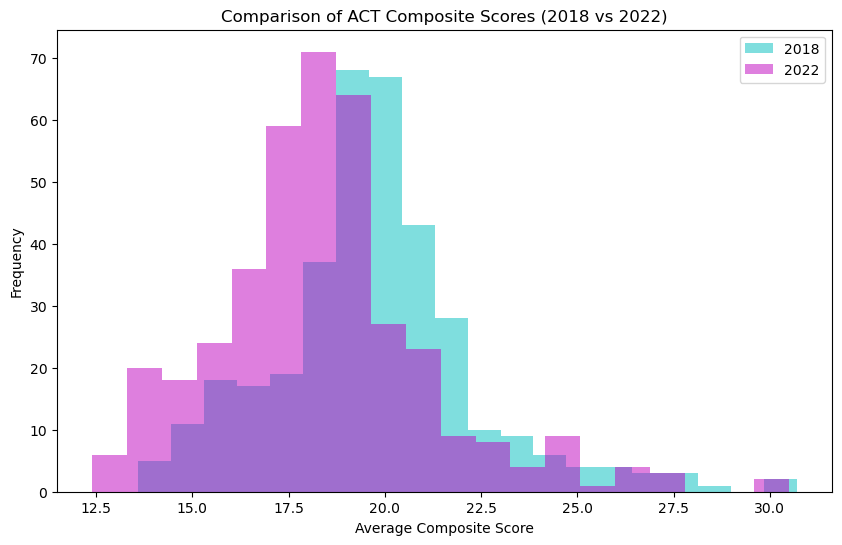

In [170]:
# Histogram comparing composite ACT scores between class of 2018 and class of 2022

# Convert 'Average Composite Score' to numeric for 2018 data
filtered_data_18_cleaned['Average Composite Score'] = pd.to_numeric(filtered_data_18_cleaned['Average Composite Score'], errors='coerce')

# Convert 'Average Composite Score' to numeric for 2022 data
filtered_data_22_cleaned['Average Composite Score'] = pd.to_numeric(filtered_data_22_cleaned['Average Composite Score'], errors='coerce')

plt.figure(figsize=(10, 6))

# Create colorblind-friendly histograms for 2018 and 2022 ACT scores
plt.hist(filtered_data_18_cleaned['Average Composite Score'], bins=20, alpha=0.5, label='2018', color='c')
plt.hist(filtered_data_22_cleaned['Average Composite Score'], bins=20, alpha=0.5, label='2022', color='m')

# Add labels and title
plt.xlabel('Average Composite Score')
plt.ylabel('Frequency')
plt.title('Comparison of ACT Composite Scores (2018 vs 2022)')
plt.legend(loc='upper right')

# Show the plot
plt.show()

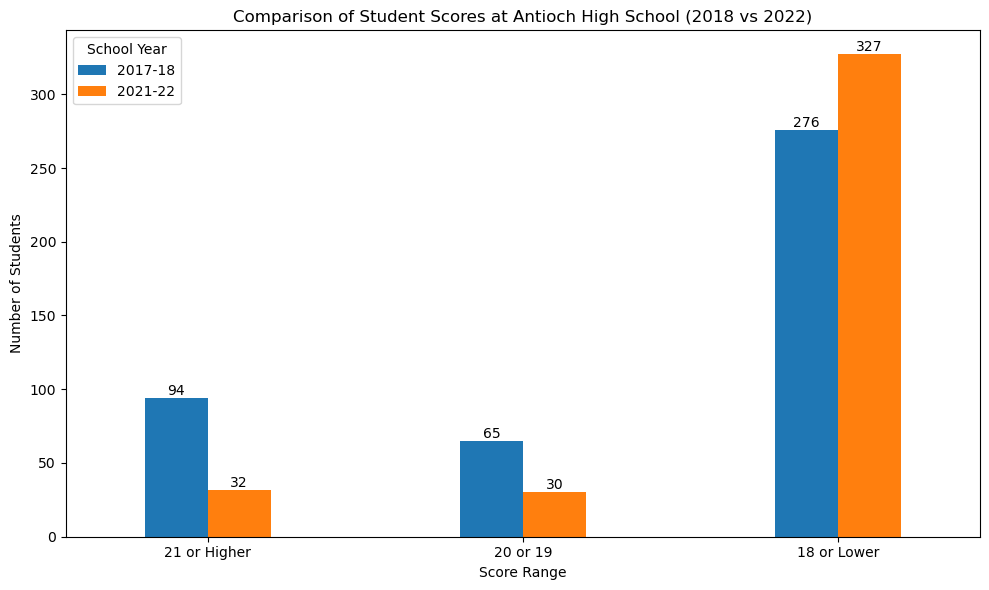

In [172]:
# Bar plot comparing amount of students recieving certain grades for Antioch High School  
# new filter
def filter_rows(df):
    condition = ((df['Number Scoring 21 or Higher'].isin(['**', '*'])) & 
                 (df['Number Scoring Below 19'].isin(['**', '*'])))
    df_filtered = df[~condition]
    return df_filtered

# Applying the filtering to the 2017-18 and 2021-22 datasets
df_2017_18_all_students_filtered = filter_rows(df_2018_all_students_cleaned)
df_2021_22_all_students_filtered = filter_rows(df_2022_all_students)

# Renaming the column 'Number Scoring Below 19' to 'Number Scoring 18 or Lower' in both datasets
df_2017_18_all_students_filtered = df_2017_18_all_students_filtered.rename(columns={'Number Scoring Below 19': 'Number Scoring 18 or Lower'})
df_2021_22_all_students_filtered = df_2021_22_all_students_filtered.rename(columns={'Number Scoring Below 19': 'Number Scoring 18 or Lower'})

# Adding the new column 'Number Scoring 20 or 19' to both datasets
df_2017_18_all_students_filtered['Number Scoring 20 or 19'] = (
    df_2017_18_all_students_filtered['Valid Tests'].astype(int) - 
    df_2017_18_all_students_filtered['Number Scoring 21 or Higher'].astype(int) - 
    df_2017_18_all_students_filtered['Number Scoring 18 or Lower'].astype(int)
)
df_2021_22_all_students_filtered['Number Scoring 20 or 19'] = (
    df_2021_22_all_students_filtered['Valid Tests'].astype(int) - 
    df_2021_22_all_students_filtered['Number Scoring 21 or Higher'].astype(int) - 
    df_2021_22_all_students_filtered['Number Scoring 18 or Lower'].astype(int)
)

# Extracting the data for Antioch High School
antioch_2017_18 = df_2017_18_all_students_filtered[df_2017_18_all_students_filtered['School Name'].str.contains('Antioch High School', case=False, na=False)]
antioch_2021_22 = df_2021_22_all_students_filtered[df_2021_22_all_students_filtered['School Name'].str.contains('Antioch High School', case=False, na=False)]

# Ensuring the data types are correct for the numerical columns
columns_of_interest = ['Number Scoring 21 or Higher', 'Number Scoring 20 or 19', 'Number Scoring 18 or Lower']
antioch_2017_18_scores = antioch_2017_18[columns_of_interest].astype(int).sum()
antioch_2021_22_scores = antioch_2021_22[columns_of_interest].astype(int).sum()

# Creating a DataFrame for easier plotting
antioch_comparison = pd.DataFrame({
    '2017-18': antioch_2017_18_scores,
    '2021-22': antioch_2021_22_scores
})

# Creating the bar plot with improvements
ax = antioch_comparison.plot(kind='bar', figsize=(10, 6), rot=0, position=1, width=0.4, color=['#1f77b4', '#ff7f0e'])

# Adding the actual count above the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%g', label_type='edge')

# Enhancing the plot aesthetics
plt.title('Comparison of Student Scores at Antioch High School (2018 vs 2022)')
plt.ylabel('Number of Students')
plt.xlabel('Score Range')
plt.xticks(ticks=[-0.2, 0.8, 1.8], labels=['21 or Higher', '20 or 19', '18 or Lower'], rotation=0)
plt.legend(title='School Year')
plt.tight_layout()
plt.show()
